In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
#import the data
data = pd.read_csv("ukraine-damages.csv", delimiter = "|")
data

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,NaN,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,D9995,UKR,Ukraine,['UKR.9_1'],Khersonska,Khersonskyi,"Health facility (hospital, health clinic)",NaN,2023-04-03,MagnoliaTV,2023-04-04,https://magnolia-tv.com/news/88335-khersonska-...,NaN,Partially damaged,2023-04-03,0.7,['7.2'],UA65
24265,D9996,UKR,Ukraine,['UKR.17_1'],Odeska,Odeskyi,Industrial/Business/Enterprise facilities,NaN,2023-04-04,Baltanews,2023-04-04,https://baltanews.city/articles/276787/vorog-a...,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA51
24266,D9997,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Industrial/Business/Enterprise facilities,the mine,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14
24267,D9998,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Government facilities,NaN,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14


In [ ]:
#Oblast is the region
#Rayon is the district within the region
#I think it makes the most sense to model at the Rayon level as these are smaller than Oblasts
#how many rayon are NaN?
a = data['rayon'].isna().sum()
b = data['rayon'].value_counts()
a,b


(np.int64(8720),
 rayon
 Nikopolskyi     2474
 Kramatorskyi    2274
 Kharkivskyi     1308
 Khersonskyi     1187
 Pokrovskyi       733
                 ... 
 Khmilnytskyi       1
 Yaltynskyi         1
 Zhmerynskyi        1
 Sambirskyi         1
 Kovelskyi          1
 Name: count, Length: 113, dtype: int64)

In [17]:
missing_r = (8720/24269)*100
missing_r

35.93061106761712

Having 35% of the rayons missing kinda stinks...

Let evaluate the oblasts for missingness

In [12]:
#how many oblasts are NaN?
c = data['oblast'].isna().sum()
d = data['oblast'].value_counts()
c,d

(np.int64(8),
 oblast
 Donetska                         6095
 Dnipropetrovska                  4053
 Kharkivska                       3393
 Khersonska                       2305
 Mykolaivska                      2110
 Sumska                           1540
 Zaporizka                         803
 Odeska                            671
 Kyivska                           645
 Luhanska                          588
 Chernihivska                      516
 Kyiv                              498
 Zhytomyrska                       204
 Khmelnytska                       177
 Poltavska                         148
 Cherkaska                         133
 Lvivska                           128
 Kirovohradska                      67
 Vinnytska                          53
 Ternopilska                        37
 Rivnenska                          22
 Ivano-Frankivska                   19
 Volynska                           16
 Autonomous Republic of Crimea      16
 Zakarpatska                        12
 Ch

In [18]:
missing_o = (8/24269)*100
missing_o

0.03296386336478636

Having only 3% missing is much more tolerable

I'll continue the code using the Oblasts vs the Rayons but this can be revised later, maybe we can fill NaN vlaues with the corresponding Oblast for missing Rayons?

In [20]:
#Trim data to only include Oblasts that are not missing
#Expecting 24261 rows
trimmed_data = data[data['oblast'].notna()]
trimmed_data

,damage_id,iso3,country,gid_1,oblast,rayon,type_of_infrastructure,if_other_what,date_of_event,source_name,source_date,source_link,additional_sources,extent_of_damage,_internal_filter_date,_weights,access_subindicator,pcode
0,D0011,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-25,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-25,0.7,['7.2'],UA44
1,D0012,UKR,Ukraine,['UKR.15_1'],Luhanska,Siverskodonetskyi,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Partially damaged,2022-03-26,0.7,['7.2'],UA44
2,D0015,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Warehouse,NaN,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Unknown,2022-03-26,1.0,['7.2'],UA46
3,D0016,UKR,Ukraine,['UKR.14_1'],Lvivska,NaN,Aircraft repair plant,Aircraft repair plan,2022-03-26,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-26,1.0,['7.2'],UA46
4,D0017,UKR,Ukraine,['UKR.12_1'],Kyivska,NaN,Bridge,NaN,2022-03-22,OCHA,2022-03-28,https://reliefweb.int/report/ukraine/ukraine-h...,NaN,Destroyed,2022-03-22,1.0,['9.2'],UA32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24264,D9995,UKR,Ukraine,['UKR.9_1'],Khersonska,Khersonskyi,"Health facility (hospital, health clinic)",NaN,2023-04-03,MagnoliaTV,2023-04-04,https://magnolia-tv.com/news/88335-khersonska-...,NaN,Partially damaged,2023-04-03,0.7,['7.2'],UA65
24265,D9996,UKR,Ukraine,['UKR.17_1'],Odeska,Odeskyi,Industrial/Business/Enterprise facilities,NaN,2023-04-04,Baltanews,2023-04-04,https://baltanews.city/articles/276787/vorog-a...,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA51
24266,D9997,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Industrial/Business/Enterprise facilities,the mine,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14
24267,D9998,UKR,Ukraine,['UKR.6_1'],Donetska,Bakhmutskyi,Government facilities,NaN,2023-04-04,Ukrainska Pravda,2023-04-04,https://www.pravda.com.ua/news/2023/04/4/7396355/,NaN,Partially damaged,2023-04-04,0.7,['7.2'],UA14


In [45]:
oblasts = trimmed_data[['oblast']].copy()
oblasts.reset_index(drop=True, inplace=True)
oblasts

,oblast
0,Luhanska
1,Luhanska
2,Lvivska
3,Lvivska
4,Kyivska
...,...
24256,Khersonska
24257,Odeska
24258,Donetska
24259,Donetska


In [52]:
#get unique oblasts for the States
states = set(oblasts.iloc[0])
for i in range(1, len(oblasts)):
    transition_i = set(oblasts.iloc[i])
    states = states.union(transition_i)
states = list(states)
states

['Kyivska',
 'Lvivska',
 'Luhanska',
 'Zakarpatska',
 'Poltavska',
 'Volynska',
 'Kirovohradska',
 'Khersonska',
 'Mykolaivska',
 'Cherkaska',
 'Ternopilska',
 'Kyiv',
 'Donetska',
 'Autonomous Republic of Crimea',
 'Rivnenska',
 'Kharkivska',
 'Dnipropetrovska',
 'Chernivetska',
 'Sevastopol',
 'Zaporizka',
 'Vinnytska',
 'Ivano-Frankivska',
 'Sumska',
 'Odeska',
 'Chernihivska',
 'Khmelnytska',
 'Zhytomyrska']

In [53]:
#Now we need to modify the oblast df so the next oblast is in a new column "next_oblast"
oblasts['Current_State'] = oblasts['oblast']
oblasts['Next_State'] = oblasts['oblast'].shift(-1)
oblast_transition = oblasts.dropna(subset=['Next_State'])
oblast_transition

,oblast,Current_State,Next_State
0,Luhanska,Luhanska,Luhanska
1,Luhanska,Luhanska,Lvivska
2,Lvivska,Lvivska,Lvivska
3,Lvivska,Lvivska,Kyivska
4,Kyivska,Kyivska,Chernihivska
...,...,...,...
24255,Khersonska,Khersonska,Khersonska
24256,Khersonska,Khersonska,Odeska
24257,Odeska,Odeska,Donetska
24258,Donetska,Donetska,Donetska


In [55]:
#Setting up the transition matrix
#S is the number of states
#tr_counts is the transition count matrix filled with zeros
S = len(states)
tr_counts = np.zeros( (S, S) )

In [66]:
#Fill the transition count matrix
for i in range(len(oblast_transition)):
    current_state = oblast_transition.iloc[i]['Current_State']
    next_state = oblast_transition.iloc[i]['Next_State']
    
    current_index = states.index(current_state)
    next_index = states.index(next_state)
    
    tr_counts[current_index, next_index] += 1
print("Transition Counts Matrix:\n", tr_counts)

Transition Counts Matrix:
 [[4.150e+03 3.000e+01 5.000e+01 0.000e+00 4.000e+01 1.000e+01 2.000e+01
  2.200e+02 8.000e+01 6.000e+01 1.000e+01 1.800e+02 2.300e+02 1.000e+01
  0.000e+00 3.000e+02 3.700e+02 0.000e+00 0.000e+00 1.500e+02 2.000e+01
  0.000e+00 2.100e+02 1.000e+02 1.500e+02 1.000e+01 5.000e+01]
 [5.000e+01 7.100e+02 2.000e+01 2.000e+01 2.000e+01 0.000e+00 2.000e+01
  1.000e+01 0.000e+00 0.000e+00 1.000e+01 3.000e+01 5.000e+01 0.000e+00
  1.000e+01 1.400e+02 8.000e+01 0.000e+00 0.000e+00 3.000e+01 0.000e+00
  2.000e+01 5.000e+01 1.000e+01 0.000e+00 0.000e+00 0.000e+00]
 [4.000e+01 4.000e+01 3.290e+03 0.000e+00 3.000e+01 0.000e+00 1.000e+01
  2.300e+02 1.300e+02 1.000e+01 1.000e+01 7.000e+01 8.300e+02 0.000e+00
  2.000e+01 4.800e+02 5.000e+02 0.000e+00 0.000e+00 4.000e+01 1.000e+01
  0.000e+00 4.000e+01 2.000e+01 7.000e+01 1.000e+01 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 6.000e+01 0.000e+00 0.000e+00 0.000e+00
  1.000e+01 0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+01 0.

In [69]:
#Now we need to normalize the transition counts to get probabilities
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[6.450e+03 1.280e+03 5.870e+03 1.200e+02 1.480e+03 1.600e+02 6.700e+02
  2.305e+04 2.110e+04 1.330e+03 3.700e+02 4.980e+03 6.095e+04 1.600e+02
  2.200e+02 3.393e+04 4.053e+04 7.000e+01 5.000e+01 8.030e+03 5.300e+02
  1.900e+02 1.540e+04 6.710e+03 5.160e+03 1.770e+03 2.040e+03]]


In [70]:
#Continue to normalize by dividing each element by the sum of its column make sure we dont divide by zero
tr_pr = np.divide(tr_counts, sums, 
                             out=np.zeros_like(tr_counts), 
                             where=sums!=0)

print('Transition Proportions:\n')

tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
print(tr_df)

Transition Proportions:

                               Kyivska  Lvivska  Luhanska  Zakarpatska  \
Kyivska                           0.64     0.02      0.01         0.00   
Lvivska                           0.01     0.55      0.00         0.17   
Luhanska                          0.01     0.03      0.56         0.00   
Zakarpatska                       0.00     0.00      0.00         0.50   
Poltavska                         0.01     0.01      0.01         0.00   
Volynska                          0.00     0.01      0.00         0.00   
Kirovohradska                     0.00     0.00      0.00         0.00   
Khersonska                        0.04     0.02      0.04         0.00   
Mykolaivska                       0.01     0.02      0.02         0.00   
Cherkaska                         0.00     0.00      0.01         0.00   
Ternopilska                       0.00     0.00      0.00         0.00   
Kyiv                              0.04     0.02      0.01         0.00   
Donetska     

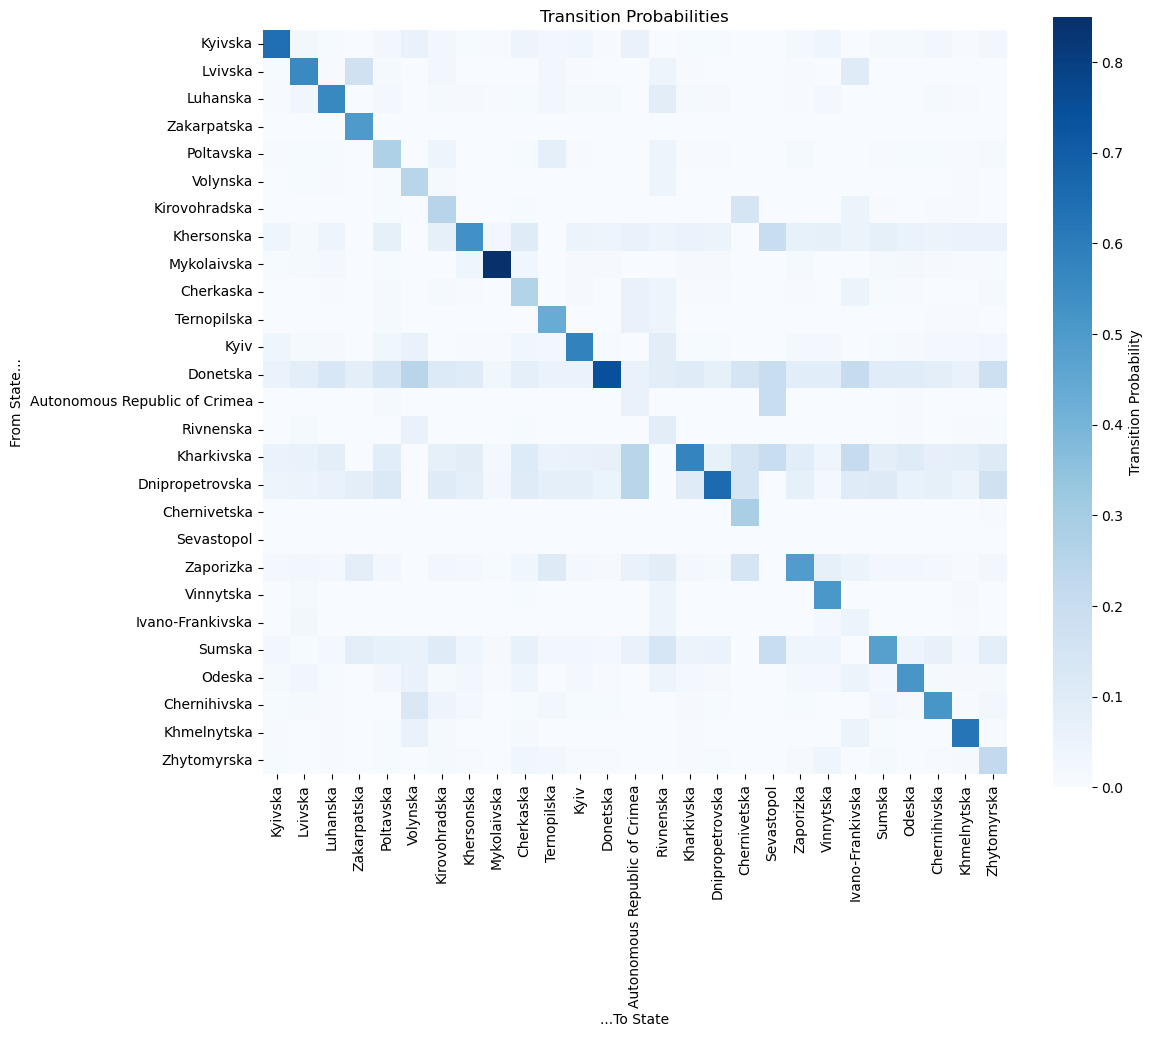

In [73]:
plt.figure(figsize=(12, 10))
sns.heatmap(tr_pr, 
            cmap='Blues',    
            square=True,          
            xticklabels=states,
            yticklabels=states,
            cbar_kws={'label': 'Transition Probability'})

plt.title('Transition Probabilities')
plt.xlabel('...To State')
plt.ylabel('From State...')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

Based on this the most likely state to transition to is the Oblast youre already in.